# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

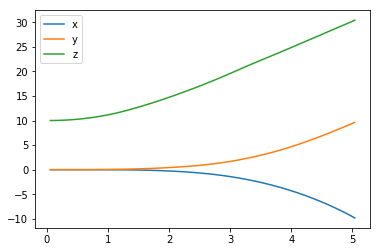

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

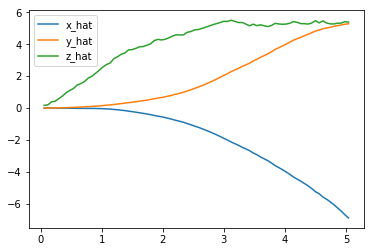

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

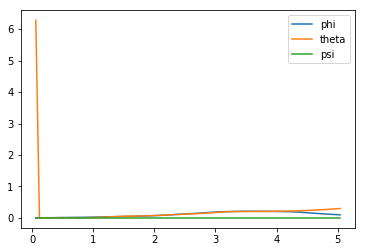

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

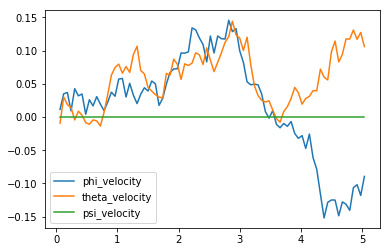

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

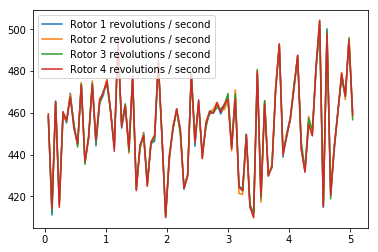

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -9.81929541   9.62751318  30.42056942   0.09832164   0.2971151    0.        ]
[-6.88854285  5.28139078  5.38344333]
[-0.08949618  0.10600645  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [11]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.398 (best =   0.351), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## Take off / lift up from [0, 0, 10] to [0, 0, 20]

import sys
import numpy as np
import pandas as pd
from agents.agent import DDPG
from task import TakeOffTask

num_episodes = 500
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pose = np.array([0., 0., 20.])
task = TakeOffTask(target_pos=target_pose, init_pose=init_pose, runtime=3)
agent = DDPG(task) 

labels = ['episode', 'time', 'reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity', 'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity', 'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
rewards = []
saved_results = {}

for i_episode in range(1, num_episodes+1):
    results = {x : [] for x in labels} # reset state history of 1 episode
    state = agent.reset_episode() # start a new episode

    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
            
        to_write = [i_episode, task.sim.time, reward] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
            
        if done:
            rewards.append(reward)
            saved_results[i_episode] = results
            print("\rEpisode = {:4d}, score = {:7.3f} last_z = {:1.1f} (best = {:7.3f})".format(
                i_episode, agent.score, task.sim.pose[2], agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

Using TensorFlow backend.


[ 0.  0. 10.  0.  0.  0.]
[ 0.  0. 20.]
Episode =  500, score =  -0.713 last_z = 19.3 (best =  -0.683))

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

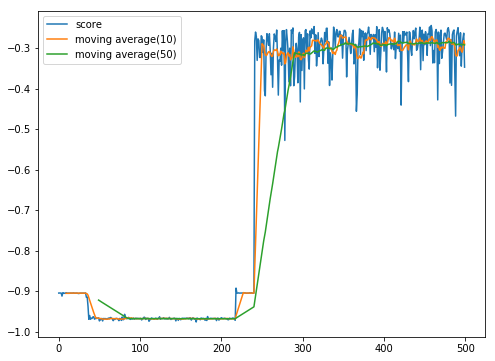

In [10]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

last_rewards = rewards
df = pd.DataFrame({'score': last_rewards})
mov_avg_10 = df.rolling(window=10).mean()
mov_avg_50 = df.rolling(window=50).mean()

plt.figure(figsize=(8, 6))
plt.plot(df['score'], label='score')
plt.plot(mov_avg_10['score'], label='moving average(10)')
plt.plot(mov_avg_50['score'], label='moving average(50)')
plt.legend()
_ = plt.ylim()

### Best, last-mean (10), last-mean(50) scores

In [23]:
'best score: {:1.3f}, last-mean(10): {:1.3f}, last-mean(50): {:1.3f}'.format(
    df['score'].max(), mov_avg_10['score'].iloc[-1], mov_avg_50['score'].iloc[-1]
)

'best score: -0.244, last-mean(10): -0.290, last-mean(50): -0.293'

### Plots

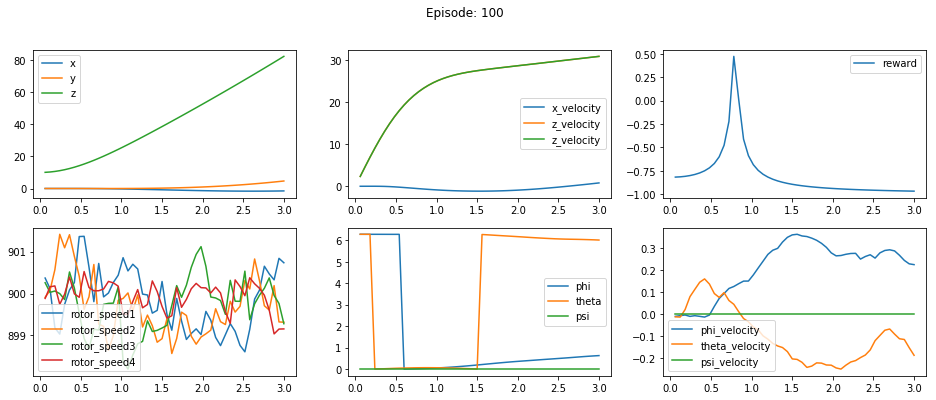

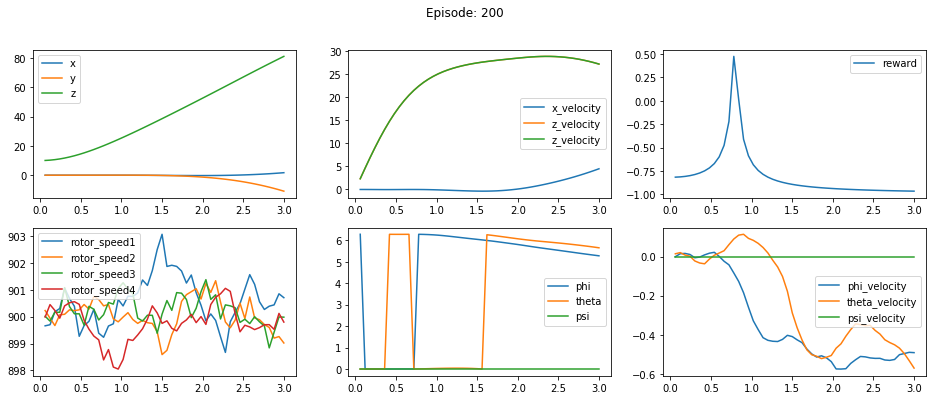

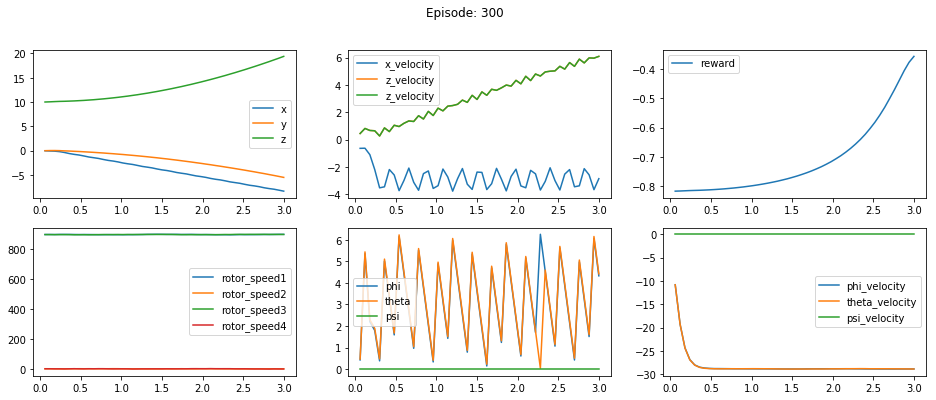

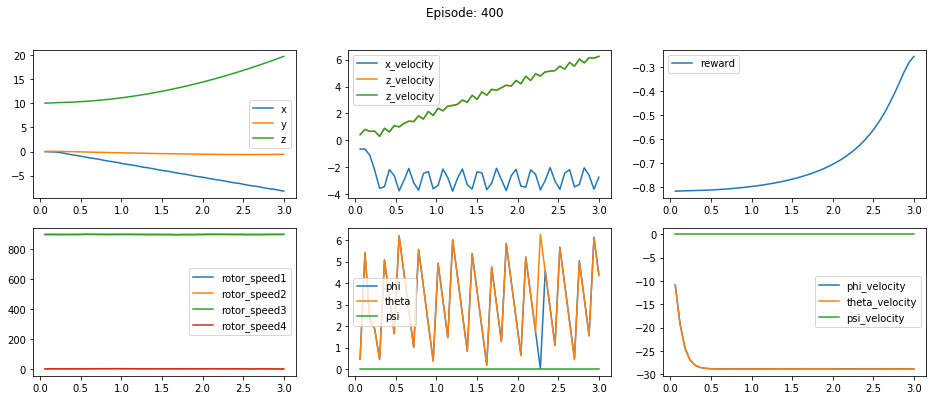

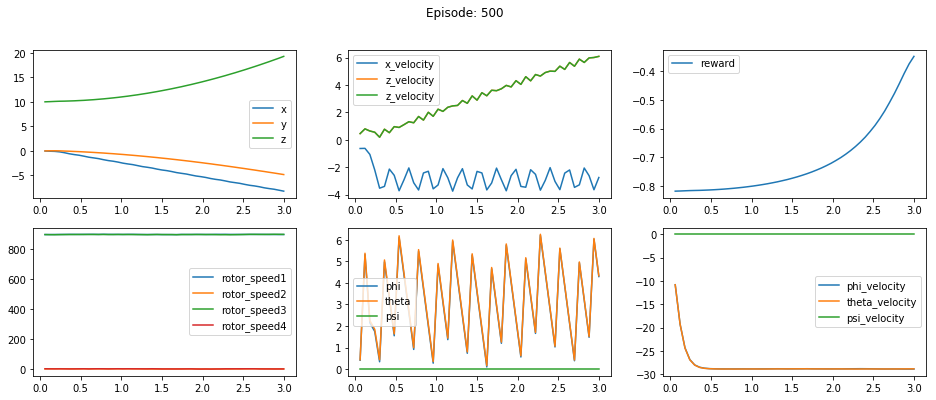

In [3]:
def plot_subgraph(g, data, labels):
    for label in labels:
        g.plot(data['time'], data[label], label=label)
    g.legend()
    
def show_graph(episode_results, i_episode):
    fig, g = plt.subplots(ncols=3, nrows=2, figsize=(16, 6))
    fig.suptitle('Episode: %d' % i_episode)
    plot_subgraph(g[0][0], episode_results[i_episode], ['x', 'y', 'z'])
    plot_subgraph(g[0][1], episode_results[i_episode], ['x_velocity', 'z_velocity', 'z_velocity'])
    plot_subgraph(g[0][2], episode_results[i_episode], ['reward'])
    plot_subgraph(g[1][0], episode_results[i_episode], ['rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4'])
    plot_subgraph(g[1][1], episode_results[i_episode], ['phi', 'theta', 'psi'])
    plot_subgraph(g[1][2], episode_results[i_episode], ['phi_velocity', 'theta_velocity', 'psi_velocity'])
    plt.show()

step = 100
for i in range(step, len(saved_results) + 1, step):
    show_graph(saved_results, i)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

Task
- Lift up from [0,0,10] to [0,0,20]
- The implementation of task.py is straight forward. In each step, task receives the actions from main script which is originally predicted by the agent (=actor with current policy). Then task obtains next state, reward and done by calling the simulator and reward function (input is the action). Finally these action, reward, next state and done are provided to the agent to learn.

Reward function
- After many trials, finally I chose a simple reward function which is based on the euclid distance from current position to target position. If the current position and target position is same, reward will be 1.0. Gap between current and target position in any dierction results in lesser reward. I've also emphasized the z-distance rather than x and y (z is 3.3 times stronger than x and y), since it was difficut to control the z velocity and the copter easily falls down to the ground. The reward is normalized between -1.0 and 1.0.

- Before the simple reward function, I tried many reward functions and combination of them, such as penalty of the acceleration, angular, pose (phi, theta, psi) to stabilize the copter within certain range, since my task is a simple take off. I also added additional penalties such as fall down to the ground to -1. However, I didn't see clear improvements with them or I even see that the copter just got more confused. So I decided to stick on the simpler reward function described above.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I only tried the Deep Deterministic Policy Gradients, as it seems good for continuous space tasks.
- Hyper parameters (most of them are default)
  - noise.mu = 0
  - noise.theta = 0.15 (no effect since mu is 0)
  - noise.sigma = 0.4 (Since my agent often captured by local optima, I increased it. I also tried 0.1, 0.2, 0.3, 0.5.)
  - replay memory buffer size = 100000
  - replay memory batch size = 64 (also tried 128, 256)
  - discount factor = 0.99 (also tried 0.5, 0.9)
  - tau = 0.01 (also tried 0.001, 0.05, 0.1)
- Neural network architecture (DDPG)
  - Actor:
    - Dense(32, LeRU), Dense(64, LeRU), Dense(32, LeRU), Sigmoid, Rescale to action range
  - Critic:
    - Action: Dense(32, LeRU), Dense(64, LeRU)
    - State: Dense(32, LeRU), Dense(64, LeRU)
    - Output: LeRU(Action + State), Dense(1, Linear)
  - Agent
    - For predicting the roter speeds, used the local actor policy, then applied Ornstein-Uhlenbeck Noise.
    - Memorize state, action, reward and next_state pair in replay buffer
    - When enough memory available, train the local critic and actor model, then update the target models with the weights of local models.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- It was **REALLY** hard. But, I think the take off task is easier than other tasks like hovering, because the elevation control is really sensitive operation.
- The reward graph of the moving average (50) shows a gradual learning curve improvement starting from episode 240 (reward is slightly increasing). The aha-moment also at episode 240 as we can see the drastic improvement of reward there.
- It is a good performance in terms of z-dimension because the best score and the mean rewards over the last 10 episodes is not so different (best: -0.244, mean of last 10: -0.290). For x and y dimension, it's fair. However, there would be more room to improve, since the copter can move from initial to target within 1 sec then hover at target position. In this case, averaged reward in one episode would be larger.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Brief summary of my workin experience on this project.

- I tweaked many parameters one by one. At first I used the simple reward function like ( sim.v[2] ), since the copter tended to naturally fall down. Once I saw some positive move on the z-dimension, I tried several complex reward functions as I already wrote above (with adding more state like velocities, angles...etc). However most of the reward functions resulted in poor performance (many of didn't learn at all). I also trid richer network by increasing the unit size (2 to 4 times) and add the batch-norm, dropout. It also didn't help much. Of course, I also tried the various hyper parameters. Any of them didn't work well and I was really confused.

- So, I restarted the project with very simple reward function with provided DDPG architecture. Then I changed the initial position to be z=10 and target z=20. I thought agent would learn more about z-move since it can experience the negative reward of falling down as there is more room to fall down. The reason I changed to the initial z from 0 to 10 is that I observed the copter fell down immediately after lifting up, so agent has less chance to study. Then agent started to learn. I think this approach worked well. 

For the first question:

- The hardest part was to defnining the right reward function. It was really sensitive, and it required numerous number of trials. When I applied the complex reward function, the copter naturally falls down very easily.
- The second hardest parts are to understand/define the task (not codes, I mean the scenario) itself, and understand state of copter (meaning of phi, angle, still no idea about some status)
- Finally the third one is to understand the code and algo.
- I think we will face the similar difficulties in the real world project, as we have to clearly define the task, reward and understand the environment...

For the second question:

- An agent exceeded the target height very much in younger episodes, but lerned to move to the right height gradually.
- It moves like a zig-zag fashion.